<a href="https://colab.research.google.com/github/Ronak1801/CLUSTERING_IMPLEMENTATION/blob/main/MinorProject3(Ronak_Jain).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
#Reading the excel file
data=pd.read_csv("income.csv")

In [3]:
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
data.corr()

,Age,Income($)
Age,1.000000,0.496856
Income($),0.496856,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

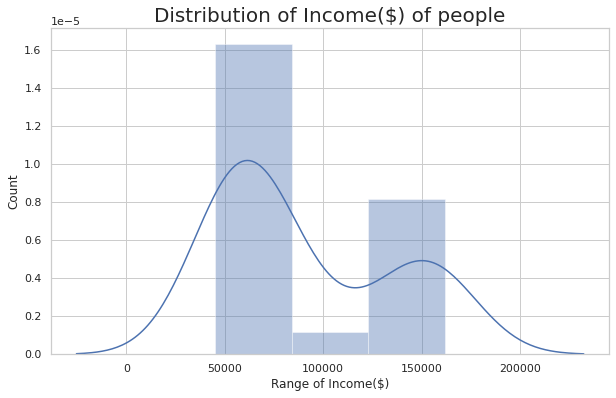

In [5]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Income($)'])
plt.title('Distribution of Income($) of people', fontsize = 20)
plt.xlabel('Range of Income($)')
plt.ylabel('Count')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

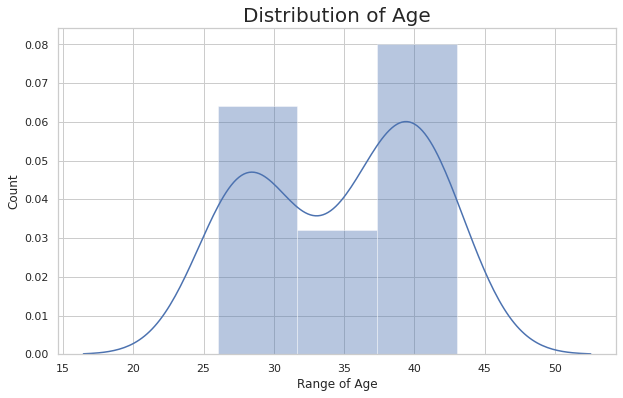

In [6]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

In [7]:
#We take just the Annual Income and Spending score
df1=data[["Name","Age","Income($)"]]
X=df1[["Income($)","Age"]]

In [8]:
#The input data
X.head()

,Income($),Age
0,70000,27
1,90000,29
2,61000,29
3,60000,28
4,150000,42


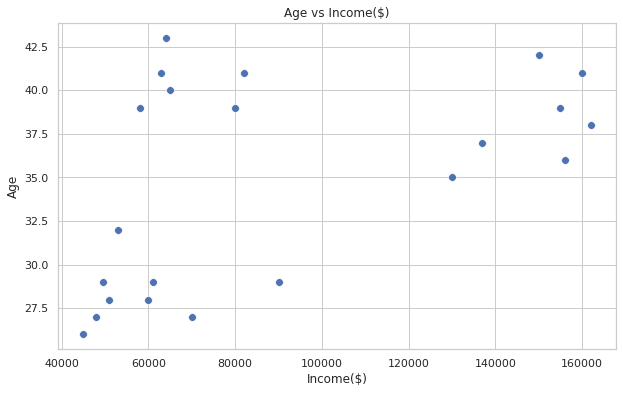

In [9]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Income($)',y = 'Age',  data = X  ,s = 60 )
plt.xlabel('Income($)')
plt.ylabel('Age') 
plt.title('Age vs Income($)')
plt.show()

In [10]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

In [11]:
from sklearn import preprocessing
x_scaled=preprocessing.scale(data.iloc[:,1:])
x_scaled

array([[-1.35605536, -0.48068427],
       [-1.00915747, -0.01015907],
       [-1.00915747, -0.69242061],
       [-1.18260641, -0.71594687],
       [ 1.24567876,  1.40141653],
       [ 0.72533193,  1.51904783],
       [ 1.07222982,  1.63667914],
       [ 0.55188299,  1.68373166],
       [ 0.20498511,  1.54257409],
       [ 0.03153617,  0.93089133],
       [ 0.37843405,  1.09557515],
       [-1.5295043 , -1.06884077],
       [-1.35605536, -0.99826199],
       [-1.18260641, -0.92768321],
       [-1.00915747, -0.9629726 ],
       [-0.48881065, -0.88063069],
       [ 0.89878087, -0.59831557],
       [ 1.07222982, -0.64536809],
       [ 1.4191277 , -0.62184183],
       [ 0.72533193, -0.24542167],
       [ 1.07222982, -0.19836915],
       [ 0.72533193, -0.76299939]])

In [12]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    #km.fit(X)
    km.fit(x_scaled)
    wcss.append(km.inertia_)
    wcss

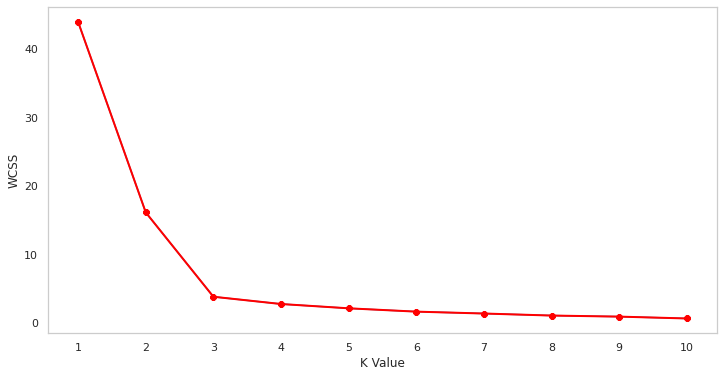

In [13]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [14]:
#Taking 3 clusters
##Taking the infer from the elbow curve
km1=KMeans(n_clusters=3)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df1["label"] = y
#The new dataframe with the clustering done
df1.head()

,Name,Age,Income($),label
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


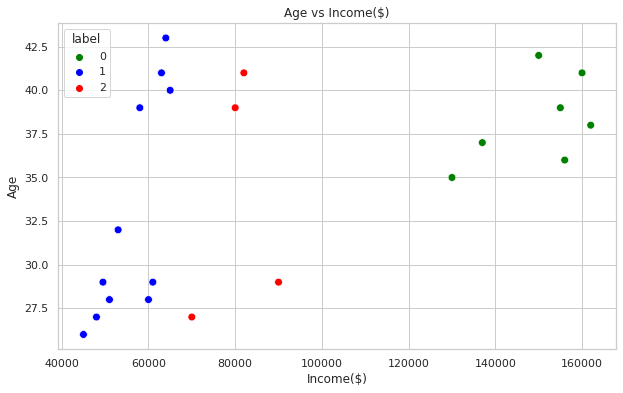

In [15]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Income($)',y = 'Age',hue="label",  
                 palette=['green','blue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Income($)')
plt.ylabel('Age') 
plt.title('Age vs Income($)')
plt.show()